In [93]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [94]:
df = pd.read_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC = pd.read_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCstd = pd.read_csv("../data/ChungCheonDC/CompositeDCstddata.csv")

In [95]:
df.keys()

Index([u'Unnamed: 0', u'date', u'reservoirH', u'upperH_med', u'downH_med',
       u'Rainfall (mm)', u'Temp (degree)', u'Moisture (percent)'],
      dtype='object')

In [96]:
df_DC.keys()

Index([u'Unnamed: 0', u'2134', u'3245', u'4356', u'5467', u'6578', u'7689',
       u'87910', u'981011', u'1091112',
       ...
       u'37364546', u'38374647', u'39384748', u'40394849', u'41404950',
       u'42415051', u'43425152', u'44435253', u'45445354', u'date'],
      dtype='object', length=382)

In [202]:
print df_DC['1091112'].values

[ 52.62985  53.0818   53.8211   31.94895  10.6175   52.3622   52.47435
  52.87395  52.9531   53.4017   53.26835  53.2491   53.8277   54.25325
  54.21225  54.04495  54.2754   54.8725   54.6623   54.7419   54.84515
  54.51715  54.3112   54.44695  54.5445   54.036    54.5073   54.88615
  55.2848   55.50815  55.72585  56.3036   55.94875  55.85785  56.3621
  56.7419   56.7122   56.8437   56.8809   58.0114   34.59725  11.31115
  57.1471   56.43605  57.30125  57.1745   56.04825  55.73435  56.0642
  56.2372   55.9092   55.3432   55.1604   55.7923   55.0256   55.09915
  54.9215   54.8456   56.1425   56.0063   56.511         nan  56.3621
  56.82765  56.4205   56.0548   56.3998        nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan  53.1195   53.53135       nan  53.0106   52.43615
  52.14445  50.9711   50.9466   50.49185  50.4235   50.4716   50.1247
  50.5451 

In [210]:
temp = df_DC['2134'].values
temp1 = max(temp)


In [211]:
print temp1

69.0525


In [212]:
import numpy as np
import scipy.stats as st

In [175]:
# generate the data

In [193]:
n = 100 # length of the data
x = np.random.rand(n)
y =3 + 7*x + np.random.randn(n)

In [194]:
print y

[  2.57204138   4.6264211    8.4928735    5.38433683   8.68344808
   3.09082969   5.43967128   2.80771845   8.47106595   6.70005362
   7.07312845   8.46581268   7.34645662   8.1717759    6.36378142
   3.68797635   9.56573351   9.4550672    6.8946988    4.32757955
   4.67901018   3.97320221   7.56209442   4.50119172   7.86954168
   6.24064851   4.99835074   4.69105237   7.29679253   5.24497087
   7.21962187   7.01183096   5.47880457   6.2342389    4.83496347
   6.80817422   6.93388602   3.66801109   5.03699596   7.29113616
   6.54619662   4.81981223   9.31417696   3.22827322   8.30434783
   5.99513197   5.87021273   8.43981971   3.40767134   4.79602279
   7.80582292   7.59505122   9.65961132   5.77843074   9.36292175
   6.31996548   6.64995566   6.83636461   5.68785122   2.69392284
   7.96064081   8.60918383   7.03641035   5.5405009    2.93992792
   5.24607368   5.39696471   4.83833135   7.32805761   5.90629556
   7.93065254   5.71781898  10.66461264   3.96611217   8.38967568
   7.33197

In [195]:
# perform linear regression

In [196]:
b, a, r, p, e = st.linregress(x, y)

In [197]:
print(a,b)

(3.1512383748965211, 6.5252611684779245)


In [198]:
eps = y - a - b*x  # error of fitting and measured data
x1 = np.linspace(0, 1) # x axis to plot the PI
# variace of fitting error
e_pi = np.var(eps)*(1+1.0/n + (x1-x.mean())**2/np.sum((x-x.mean())**2))
# z value using the t distribution and with dof = n-2
z = st.t.ppf(0.95, n-2)
# prediction interval
pi = np.sqrt(e_pi)*z
zl = st.t.ppf(0.10, n-2) # z at 0.1
zu = st.t.ppf(0.90, n-2) # z at 0.9
ll = a + b*x1 + np.sqrt(e_pi)*zl # 10 %
ul = a + b*x1 + np.sqrt(e_pi)*zu # 90 %

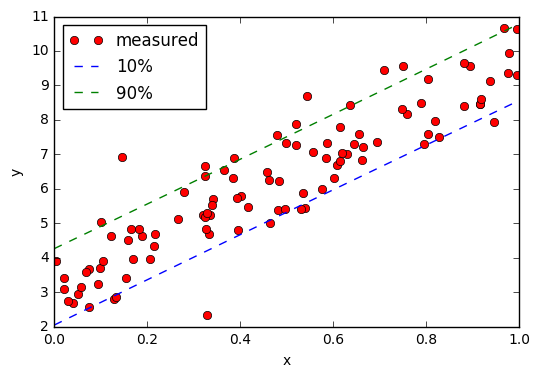

In [199]:
import matplotlib.pyplot as plt
plt.plot(x,y,'ro', label='measured')
plt.plot(x1,ll,'--', label='10%')
plt.plot(x1,ul,'--', label='90%')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.savefig('lin_regress.png')


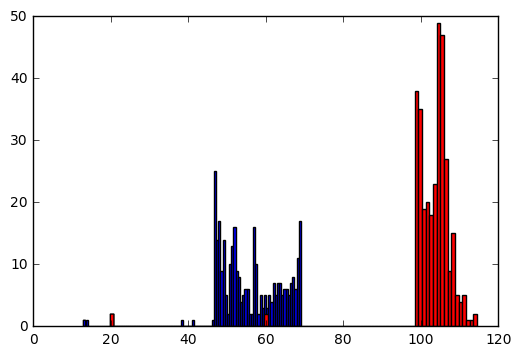

In [97]:
 temp = df_DC['2134'].values
 out = hist(temp[~np.isnan(temp)], bins=100)
temp1 = df_DC['39384748'].values
out = hist(temp1[~np.isnan(temp1)], bins=100, color='r')

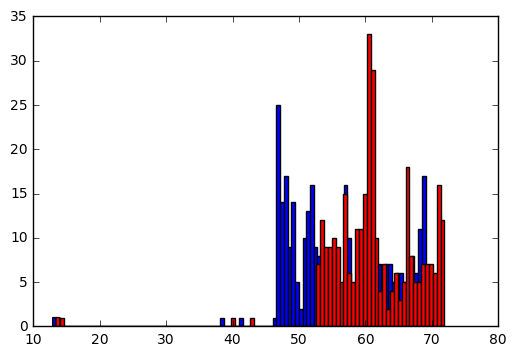

In [98]:
 temp = df_DC['2134'].values
 out = hist(temp[~np.isnan(temp)], bins=100)
temp1 = df_DC['3245'].values
out = hist(temp1[~np.isnan(temp1)], bins=100, color='r')

In [99]:
# missininds = np.arange(df_DC[electrodeID[elecind]].values.size)[np.isnan(df_DC[electrodeID[elecind]].values)]
electrodeID = df_DC.keys()[1:-1]

2015-09-13


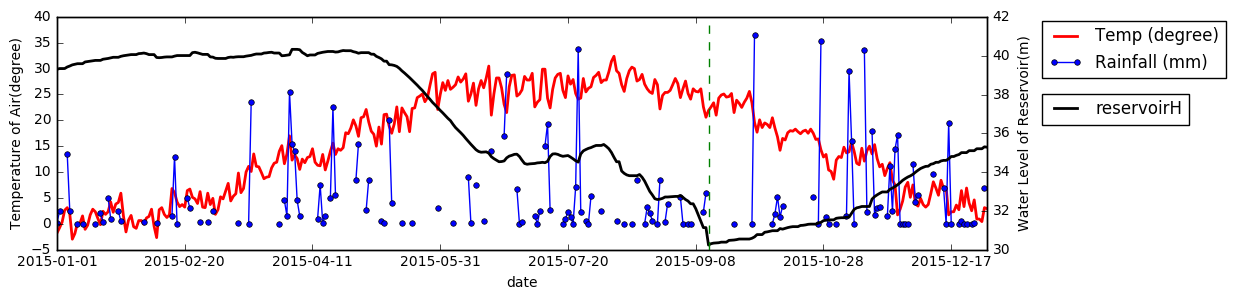

In [100]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()

#df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
#df.plot(figsize=(12,3), x='date', y='downH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='r', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Rainfall (mm)', ax=ax1, color='b', linestyle='-', marker="o", ms=4)
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)

ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.5))
itime_ref0 = 255
itime_ref1 = 115
ax1_1.plot(np.r_[itime_ref0, itime_ref0], np.r_[30, 42], 'g--')
#ax1.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 40], 'k-')

ax1.set_ylabel("Temperature of Air(degree)")
ax1_1.set_ylabel("Water Level of Reservoir(m)")

print df['date'].values[itime_ref0]

2015-09-13


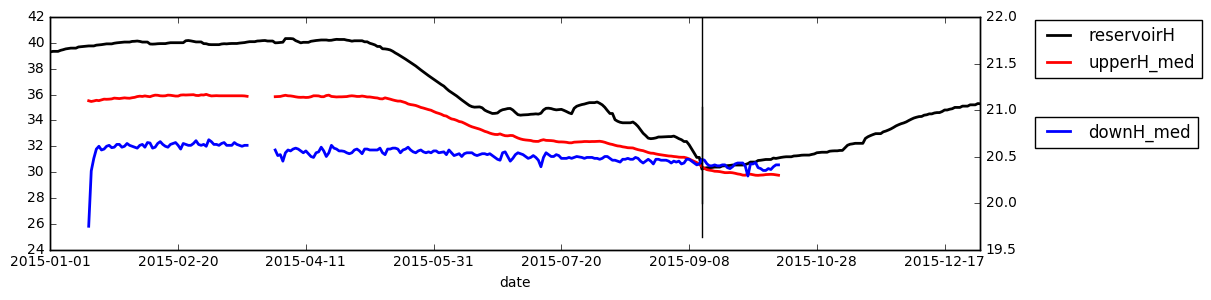

In [101]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1 , color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1 , color='r', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='downH_med', ax=ax1_1, color='b', linestyle='-', lw=2)

ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
itime_ref0 = 255
itime_ref1 = 115
ax1.plot(np.r_[itime_ref0, itime_ref0], np.r_[25, 35], 'k-')
ax1_1.plot(np.r_[itime_ref0, itime_ref0], np.r_[20, 22], 'k-')
print df['date'].values[itime_ref0]

In [102]:
from scipy import interpolate
locs = dat_temp[:,:4]
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime, itime_ref, colors, flag):
    fig = plt.figure(figsize = (12, 12))
    ax1 = plt.subplot(411)
    ax2 = plt.subplot(412)
    
    valsratio = df_DC[electrodeID].values[itime,:].flatten() / df_DC[electrodeID].values[itime_ref,:].flatten()
    valsDC = np.log10(df_DC[electrodeID].values[itime,:].flatten())
    valsDCstd = df_DCstd[electrodeID].values[itime,:].flatten()
    grid_rho_ratio = griddata(mid, dz, valsratio, grid_x, grid_z, interp='linear')
    grid_rho_ratio = grid_rho_ratio.reshape(grid_x.shape)
    if flag =="std":
        vmin, vmax = 0, 10
        grid_rho = griddata(mid, dz, valsDCstd, grid_x, grid_z, interp='linear')        
    elif flag =="rho":
        vmin, vmax = np.log10(20), np.log10(200)
        grid_rho = griddata(mid, dz, valsDC, grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
        
    
    ax1.contourf(grid_x, grid_z, grid_rho, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    vmin, vmax = 0.9, 1.1
    ax2.contourf(grid_x, grid_z, grid_rho_ratio, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = valsDC, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax1.plot(mid, dz, 'k.')
    ax2.scatter(mid, dz, s=20, c = valsratio, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax2.plot(mid, dz, 'k.')
    
    for i in range(len(colors)):
        ax1.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        ax2.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        

    ax3 = plt.subplot(413)
    ax3_1 = ax3.twinx()
    df.plot(x='date', y='reservoirH', ax=ax3_1, color='k', linestyle='-', lw=2)
    df.plot(x='date', y='upperH_med', ax=ax3_1, color='b', linestyle='-', lw=2)
    df.plot(x='date', y='Temp (degree)', ax=ax3, color='r', linestyle='-', lw=2)
    df.plot(x='date', y='Rainfall (mm)', ax=ax3, color='b', linestyle='-', marker="o", ms=4)
    ax3.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax3_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
    itime_ref0 = itime_ref
    itime_ref1 = itime
    ax3.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 40], 'k--', lw=2)
    ax3.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 40], 'k--', lw=2)
    
    ax3.set_ylabel("Temperature of Air(degree)") 
    ax3_1.set_ylabel("Water Level of Reservoir(m)")

    
    ax4 = plt.subplot(414)
    df_DC.plot(x='date', y=electrodeID[idatum], ax=ax4)
    ax4.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax4.set_yscale('log')
    temp = df_DC[electrodeID[elecind]].values
    vmax = np.median(temp[~np.isnan(temp)]) + np.std(temp[~np.isnan(temp)])*3
    vmin = np.median(temp[~np.isnan(temp)]) - np.std(temp[~np.isnan(temp)])*3
    ax4.plot(np.r_[itime_ref1, itime_ref1], np.r_[vmin, vmax], 'k--', lw=2)
    ax4.plot(np.r_[itime_ref0, itime_ref0], np.r_[vmin, vmax], 'k--', lw=2)
    
    ax4.set_ylim(vmin, vmax)
    ax4.set_ylabel("Resistivity of Raw Data (Ohm-m)") 



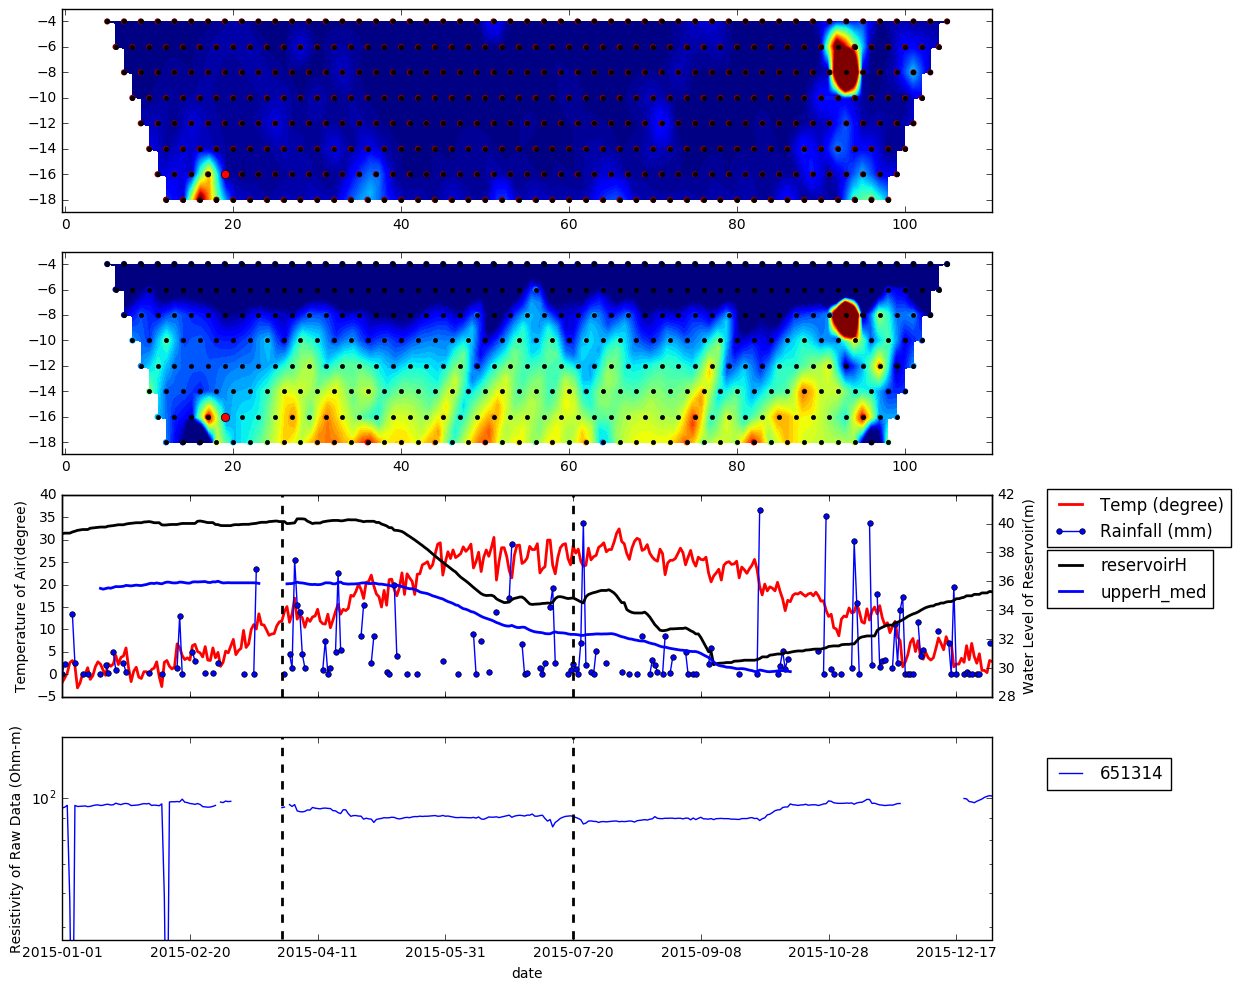

In [103]:
from ipywidgets import interact, IntSlider, ToggleButtons
itime = 93
itime_ref = 86
print df['date'].values[itime]
elecind = [53, 110, 300]
# vizDCtimeSeries(elecind, itime, itime_ref, ['k','b','r'])
viz = lambda idatum, itime, flag: vizDCtimeSeries([idatum], itime, itime_ref, ['r'], flag)
interact(viz, idatum=IntSlider(min=0, max=379, step=1, value=294)\
         ,itime=IntSlider(min=0, max=360, step=1, value=200)\
         ,flag=ToggleButtons(options=["std", "rho"]))

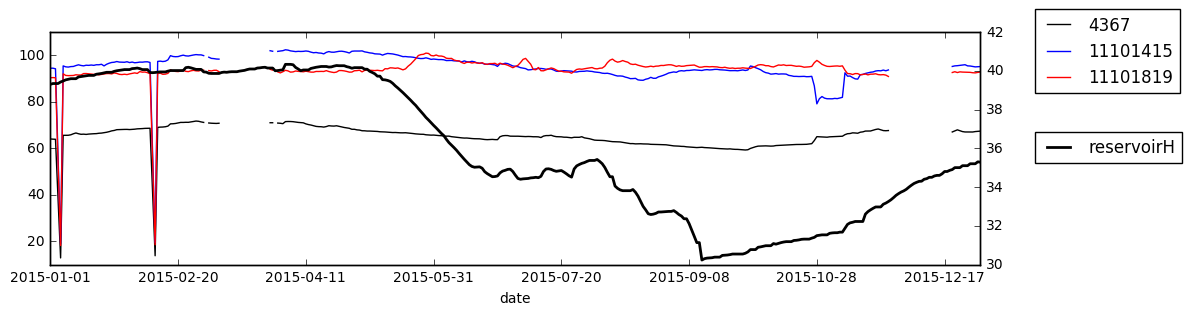

In [104]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df_DC.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'])
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
ax1.set_yscale('linear')

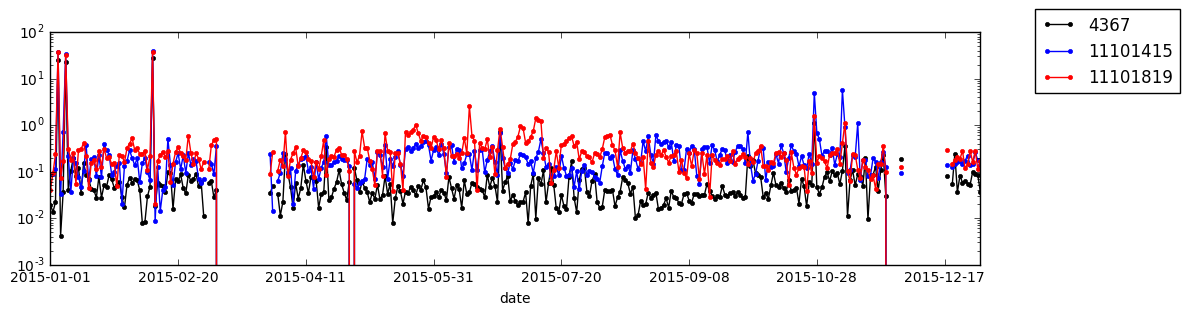

In [105]:
ax1 = plt.subplot(111)
df_DCstd.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'], linestyle="-", marker='.', lw=1)
ax1.set_yscale('log')
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))

In [106]:
sys.path.append("../codes/")
from DCdata import readReservoirDC_all
directory = "../data/ChungCheonDC/"
dat_temp,height_temp, ID = readReservoirDC_all(directory+"20151231180000.apr")